# Question1

## Part (a)

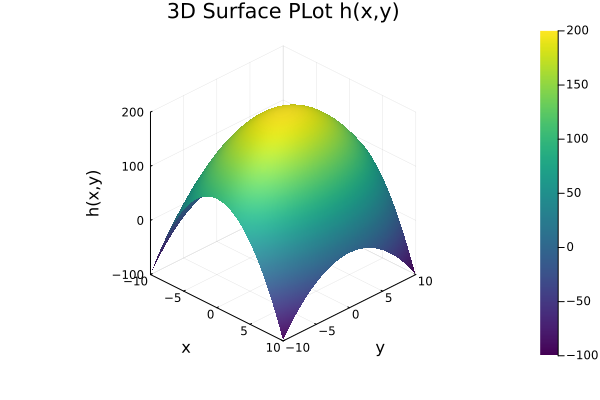

In [46]:
using Plots

h(x,y) = 200 - (x^2) - 2*(y^2)

x = -10:0.1:10
y = -10:0.1:10

z = [h(xi,yi) for xi in x, yi in y]

surface(x, y, z, title = "3D Surface PLot h(x,y)", xlabel = "x", ylabel = "y", zlabel = "h(x,y)", c = :viridis, camera = (45,30))

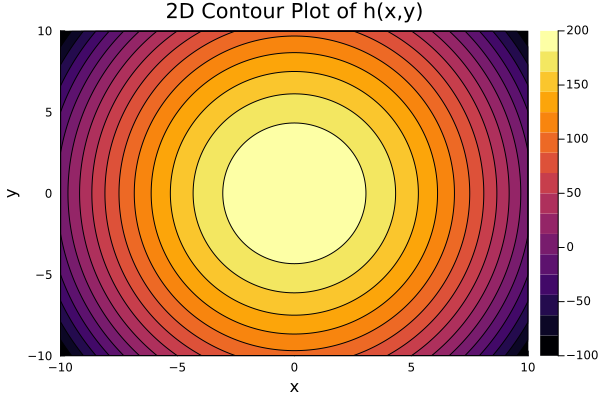

In [5]:
contour(x, y, z, xlabel = "x", ylabel = "y", title = "2D Contour Plot of h(x,y)", fill = true)

## Part (b)

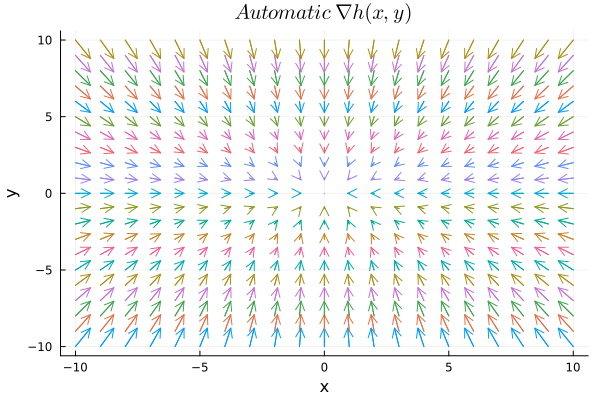

In [11]:
using CalculusWithJulia
using Plots

x = -10:1:10
y = -10:1:10

h(x) = 200 - (x[1]^2) - 2*(x[2]^2)

grad_h(x,y) = gradient(h, [x,y])

X = [xi for xi in x, yi in y]
Y = [yi for xi in x, yi in y]

u = [grad_h(xi,yi)[1] for xi in x, yi in y]
v = [grad_h(xi,yi)[2] for xi in x, yi in y]

u = u*0.03
v = v*0.03

quiver(X, Y, quiver = (u,v), title = L"Automatic \; \nabla h(x,y)", xlabel = "x", ylabel = "y")

## Part(c)

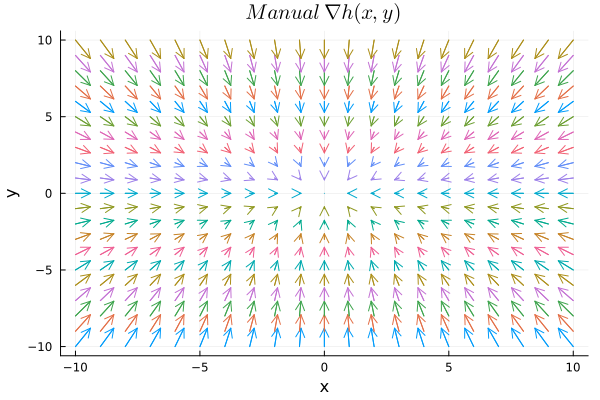

In [10]:
using Symbolics
using LaTeXStrings

@variables x y
manual_grad(v) = [-2*v[1], -4*v[2]]
manual_grad([x,y])

x_range = -10:1:10
y_range = -10:1:10

X = [xi for xi in x_range, yi in y_range]
Y = [yi for xi in x_range, yi in y_range]

u = [manual_grad([xi,yi])[1] for xi in x_range, yi in y_range]
v = [manual_grad([xi,yi])[2] for xi in x_range, yi in y_range]

u = u*0.03
v = v*0.03

quiver(X, Y, quiver = (u,v), title = L"Manual \; \nabla h(x,y)", xlabel = "x", ylabel = "y")

# Question 2

## Part (a)

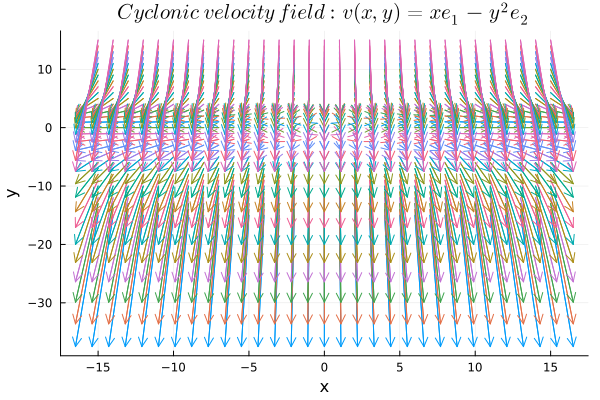

In [12]:
using Symbolics
using LaTeXStrings

@variables x y
vel(v) = [v[1], -v[2]^2]
vel([x,y])

x_range = -15:1:15
y_range = -15:1:15

X = [xi for xi in x_range, yi in y_range]
Y = [yi for xi in x_range, yi in y_range]

u = [vel([xi,yi])[1] for xi in x_range, yi in y_range]
v = [vel([xi,yi])[2] for xi in x_range, yi in y_range]

u = u*0.1
v = v*0.1

quiver(X, Y, quiver = (u,v), xlabel = "x", ylabel = "y", title = L"Cyclonic \; velocity \; field: v(x,y) = xe_{1} - y^{2}e_{2}")

## Part (b)

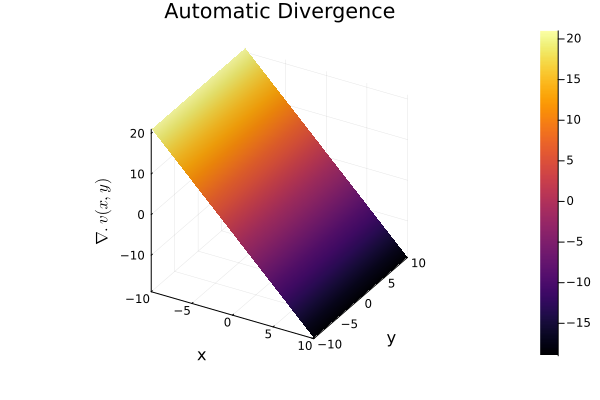

In [13]:
using CalculusWithJulia

vel(v) = [v[1], -v[2]^2]
vel([x,y])

div_vel(x,y) = divergence(vel, [x,y])

xi = -10:1:10
yi = -10:1:10

z = [div_vel(xj, yj) for xj in xi, yj in yi]

surface(xi, yi, z, xlabel = "x", ylabel = "y", zlabel = L"\nabla.v(x,y)", title = "Automatic Divergence")

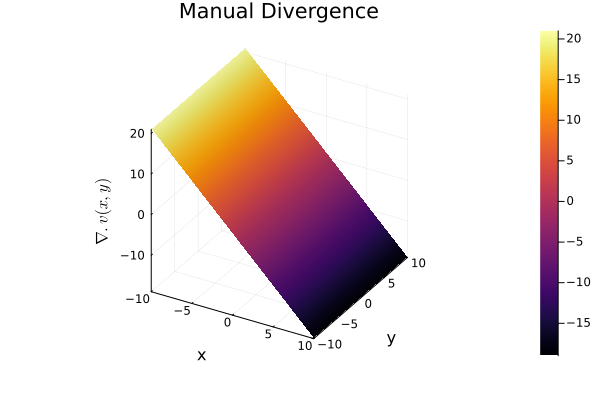

In [14]:
manual_div_vel(x,y) = 1-2*y

z = [manual_div_vel(xj, yj) for xj in xi, yj in yi]

surface(xi, yi, z, xlabel = "x", ylabel = "y", zlabel = L"\nabla.v(x,y)", title = "Manual Divergence")

## Part (c)

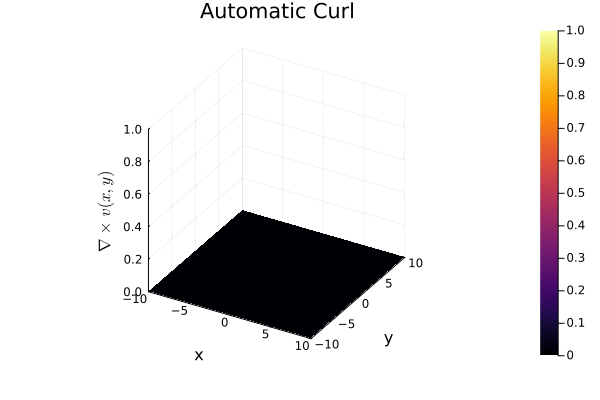

In [15]:
curl_vel(x,y) = curl(vel, [x,y]) 

z = [curl_vel(xj, yj) for xj in xi, yj in yi]

surface(xi, yi, z, xlabel = "x", ylabel = "y", zlabel = L"\nabla\times v(x,y)", title = "Automatic Curl")

Manual curl will also be same as curl of given velocity field is 0 in z direction.

# Question 3

## Part (a)

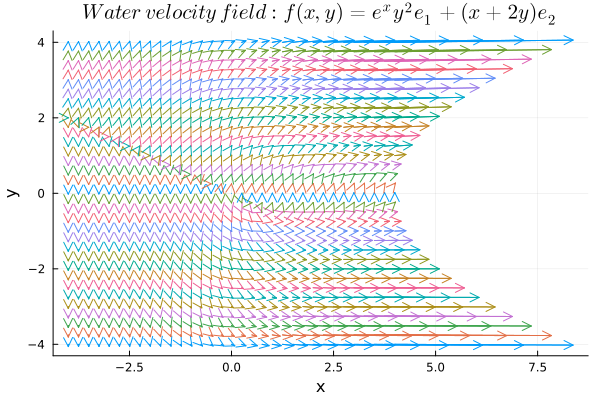

In [30]:
using Symbolics
using CalculusWithJulia
using LaTeXStrings

@variables x y
water_vel(v) = [exp(v[1]) * v[2]^2 , v[1]+2*v[2]]
water_vel([x,y])

xi = -4:0.25:4
yi = -4:0.25:4

X = [xj for xj in xi, yj in yi]
Y = [yj for xj in xi, yj in yi]

u = [water_vel([xj,yj])[1] for xj in xi, yj in yi]
v = [water_vel([xj,yj])[2] for xj in xi, yj in yi]

u = u*0.005
v = v*0.005

quiver(X, Y, quiver = (u,v), xlabel = "x", ylabel = "y" ,title = L"Water \; velocity \; field: f(x,y) = e^{x}y^{2}e_{1} + (x+2y)e_{2}")

## Part (b)

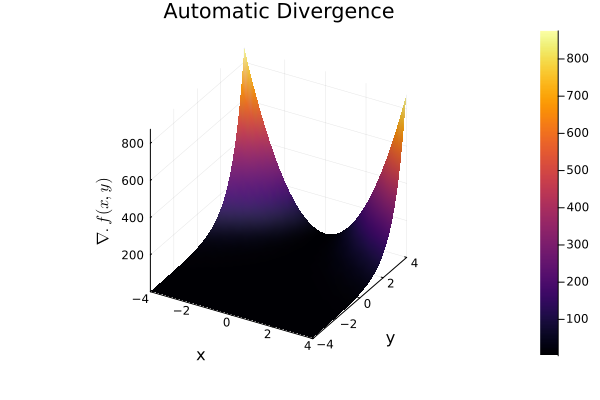

In [33]:
div_water_vel(x,y) = divergence(water_vel, [x,y])

xi = -4:0.25:4
yi = -4:0.25:4

z = [div_water_vel(xj, yj) for xj in xi, yj in yi]

surface(xi, yi, z, xlabel = "x", ylabel = "y", zlabel = L"\nabla.f(x,y)", title = "Automatic Divergence")

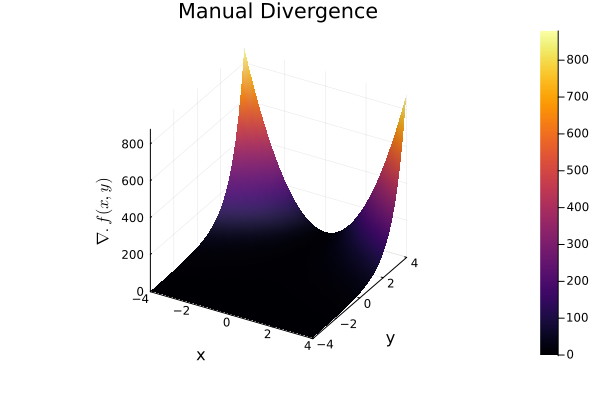

In [35]:
manual_div_water_vel(x,y) = (exp(x)*y^2) + x + 2

zm = [manual_div_water_vel(xj, yj) for xj in xi, yj in yi]

surface(xi, yi, zm, xlabel = "x", ylabel = "y", zlabel = L"\nabla.f(x,y)", title = "Manual Divergence")

## Part (c)

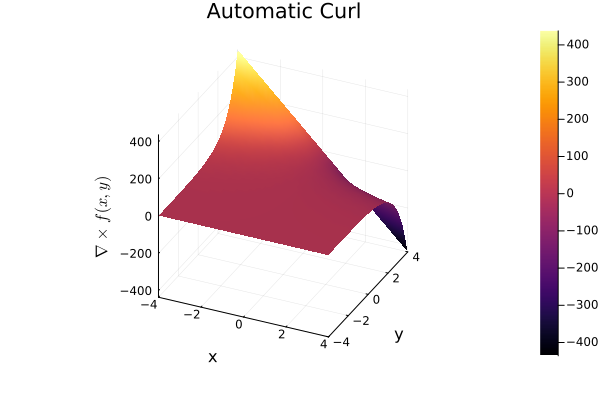

In [42]:
z = [curl(water_vel, [xj, yj]) for xj in xi, yj in yi]

surface(xi, yi, z, xlabel = "x", ylabel = "y", zlabel = L"\nabla\times f(x,y)", title = "Automatic Curl", camera = (25,30))

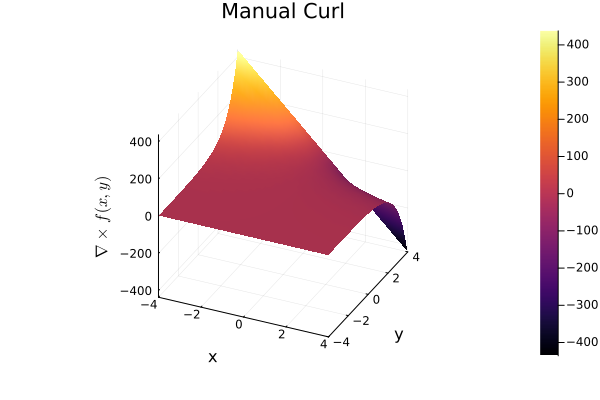

In [45]:
manual_curl(x,y) = 1 - 2*exp(x)*y

z_m = [manual_curl(xj,yj) for xj in xi, yj in yi]

surface(xi, yi, z_m, xlabel = "x", ylabel = "y", zlabel = L"\nabla\times f(x,y)", title = "Manual Curl", camera = (25,30))

# Question 4

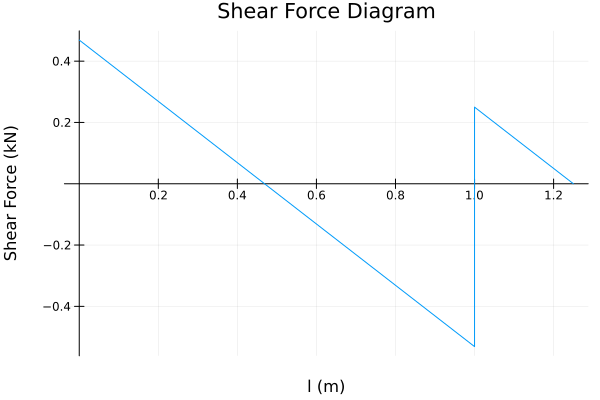

In [17]:
using Plots
gr()

q = 1
l = 1

function sfd(q,l)

    h_a = 0
    v_b = 1.25*0.625*q*l
    v_a = 1.25*q*l - (v_b)
    
    x1 = 0:0.01:l
    v1 = v_a .- q*x1

    x2 = 0:0.01:0.25*l
    v2 = v_a + v_b .- q*(l .+ x2)
    
    plot([x1; l.+x2], [v1;v2], framestyle = :origin, title = "Shear Force Diagram", xlabel = "l (m)", ylabel = "Shear Force (kN)", legend = false) 
end

sfd(q,l)

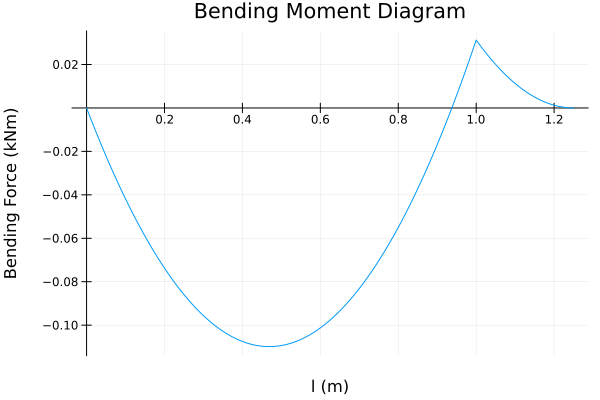

In [18]:
function bmd(q, l)

    h_a = 0
    v_b = 1.25*0.625*q*l
    v_a = 1.25*q*l - (v_b)

    x1 = 0:0.01:l
    m1 = (v_a*x1) - (q.*x1.*x1/2)

    x2 = 0:0.01:0.25*l
    m2 = (v_a*(l .+ x2)) + (v_b*x2) - (q*(l .+ x2).*(l .+ x2)/2)

    plot([x1; l.+x2], -[m1;m2], framestyle = :origin, title = "Bending Moment Diagram", xlabel = "l (m)", ylabel = "Bending Force (kNm)", legend = false) 
end


bmd(q, l)

# Question 5

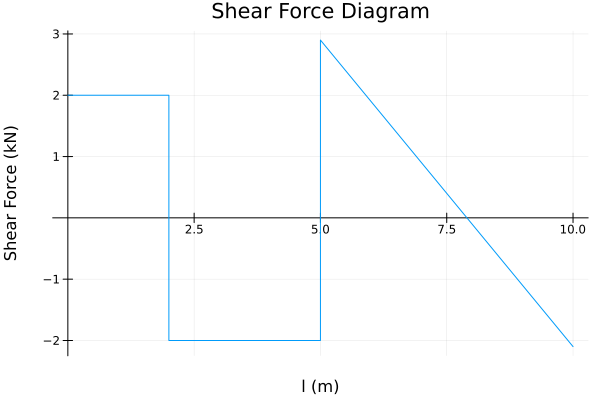

In [19]:
q = 1
l = 5

function sfd(q, l)
    
    h_c = 0
    v_a = 0.4*q*l
    v_b = (0.8*q*1.6*l) + (q*l/2) - (2*v_a)
    v_c = (0.8*q*l) + (q*l) - v_a - v_b

    x1 = 0:0.01:0.4*l
    v1 = v_a .+ (0*x1)

    x2 = 0:0.01:0.6*l
    v2 = v_a - (0.8*q*l) .+ (0*x2)

    x3 = 0:0.01:l
    v3 = v_a + v_b - (0.8*q*l) .- (q*x3)
    
    plot([x1; (0.4*l).+x2; l.+x3], [v1;v2;v3], framestyle = :origin, title = "Shear Force Diagram", xlabel = "l (m)", ylabel = "Shear Force (kN)", legend = false) 

end

sfd(q,l)

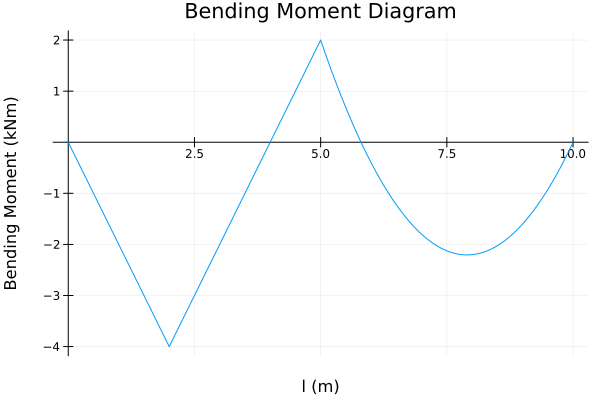

In [20]:
function bmd(q,l)

    h_c = 0
    v_a = 0.4*q*l
    v_b = (0.8*q*1.6*l) + (q*l/2) - (2*v_a)
    v_c = (0.8*q*l) + (q*l) - v_a - v_b

    x1 = 0:0.01:(0.4*l)
    m1 = v_a*x1

    x2 = 0:0.01:(0.6*l)
    m2 = v_a*(0.4*l .+ x2) - (0.8*q*l*x2)

    x3 = 0:0.01:l
    m3 = v_a*(l .+ x3) + v_b*x3 - (0.8*q*l*(0.6*l .+ x3)) - q*x3.*x3/2

    plot([x1; (0.4*l).+x2; l.+x3], -[m1;m2;m3], framestyle = :origin, title = "Bending Moment Diagram", xlabel = "l (m)", ylabel = "Bending Moment (kNm)", legend = false) 

end

bmd(q,l)